## **Contents :**

**Part 1: Exploratory Data Analysis(EDA):**

1)Analysis of the features.

2)Finding any relations or trends considering multiple features.

**Part 2: Feature Engineering and Data Cleaning:**

1)Adding any few features.

2)Removing redundant features.

3)Converting features into suitable form for modeling.

## Part 1 : Exploratory Data Analysis

In [46]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [47]:
data=pd.read_csv('C://Users/thdar/OneDrive/Desktop/titanic3.csv')

In [48]:
data.head()

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [49]:
data.isnull().sum() #checking for total null values

Pclass          0
Survived        0
Name            0
Sex             0
Age           263
Sibsp           0
Parch           0
Ticket          0
Fare            1
Cabin        1014
Embarked        2
Boat          823
Body         1188
Home.dest     564
dtype: int64

The Age, Cabin and Embarked have null values. 

###  Number of persons survived (studying the target variable)

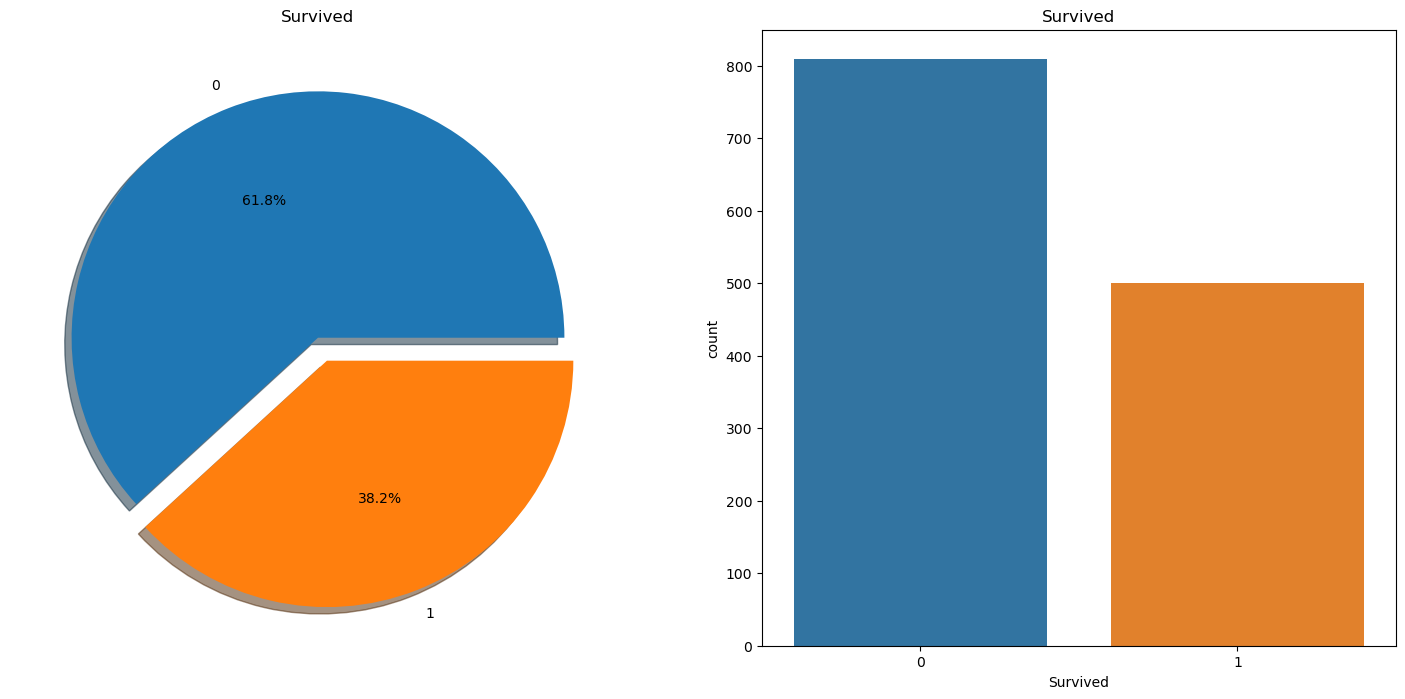

In [50]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(data,x= 'Survived',ax=ax[1])
ax[1].set_title('Survived')
plt.show()

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age,etc.

### Filling up the 'age' feature:
 - the Age feature has 263 null values. To replace these NaN values, we can assign them the mean age of the dataset.
 - But the problem is, there were many people with many different ages. We just cannot assign a 4 year kid with the mean age that is 29 years.
 - solution : we can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

In [51]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

here we are using the Regex: [A-Za-z]+).. So what it does is, it looks for strings which lie between A-Z or a-z and followed by a .(dot). So we successfully extract the Initials from the Name.

In [52]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='coolwarm') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [53]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [54]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Dona      39.000000
Master     5.482704
Miss      21.834502
Mr        32.545531
Mrs       37.034884
Other     44.923077
Name: Age, dtype: float64

### Filling NaN Ages

In [55]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [56]:
data.Age.isnull().any() #So no null values left finally 

False

----------------------------------------------------------------------------------------------------------------------------- 
## In order to see survival rates as per age category, we plot a Histogram

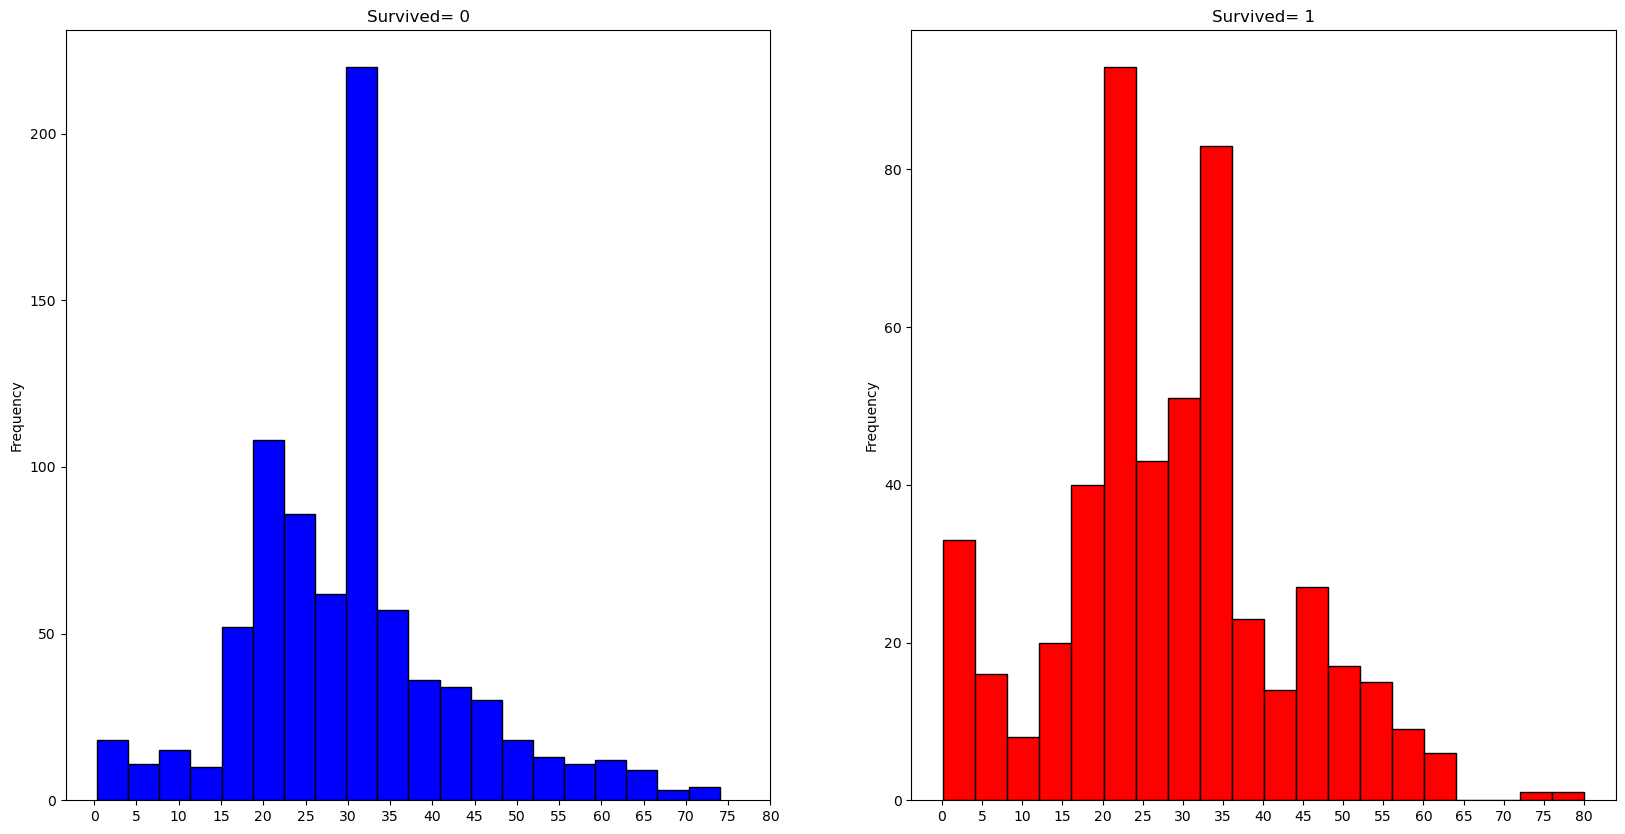

In [57]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='blue')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='red',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

Observations:

1)The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

2)The oldest Passenger was saved(80 years).

3)Maximum number of deaths were in the age group of 30-40.

--------------------------------------------------------------------------------------------------------------------------------
### Filling 'Embarked' column
As we saw that maximum passengers boarded from Port S, we replace NaN with S.

In [58]:
data['Embarked'].fillna('S',inplace=True)

In [59]:
data.Embarked.isnull().any()# Finally No NaN values

False

### Correlation Between The Features

In [60]:
data["Sex"] = [1 if i == "male" else 0 for i in data["Sex"]] 
data["Embarked"] = [0 if i == "S" else i for i in data["Embarked"]] 
data["Embarked"] = [1 if i == "C" else i for i in data["Embarked"]] 
data["Embarked"] = [2 if i == "Q" else i for i in data["Embarked"]] 
## or one hot encoder could have been used

In [61]:
cols = ["Survived","Pclass","Sex","Age","Sibsp","Parch","Fare","Embarked"]
data_corr = data[cols].corr()
data_corr

,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked
Survived,1.000000,-0.312469,-0.528693,-0.070406,-0.027825,0.082660,0.244265,0.098450
Pclass,-0.312469,1.000000,0.124617,-0.373462,0.060832,0.018322,-0.558629,0.038875
Sex,-0.528693,0.124617,1.000000,0.089642,-0.109609,-0.213125,-0.185523,-0.120423
Age,-0.070406,-0.373462,0.089642,1.000000,-0.221899,-0.141582,0.167479,0.009919
Sibsp,-0.027825,0.060832,-0.109609,-0.221899,1.000000,0.373587,0.160238,-0.073461
Parch,0.082660,0.018322,-0.213125,-0.141582,0.373587,1.000000,0.221539,-0.095523
Fare,0.244265,-0.558629,-0.185523,0.167479,0.160238,0.221539,1.000000,0.061126
Embarked,0.098450,0.038875,-0.120423,0.009919,-0.073461,-0.095523,0.061126,1.000000


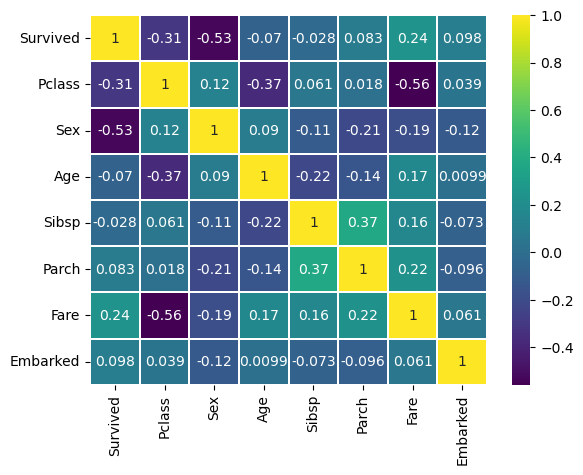

In [62]:
sns.heatmap(data_corr,annot=True,cmap='viridis',linewidths=0.1) #data.corr()-->correlation matrix
fig.set_size_inches(10,8)
plt.show()

# Interpreting The Heatmap
The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

**POSITIVE CORRELATION**: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

**NEGATIVE CORRELATION** : If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.37. So we can carry on with all features.

## Part 2:  Feature Engineering and Data Cleaning
**Now what is Feature Engineering?**

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

An example would be getting the Initals feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for Predictive Modeling.

**'age' column**

We need to convert these continous values into categorical values by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.

Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16. So bins of size 16.

In [63]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home.dest,Initial,Age_band
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,0,2,NaN,"St Louis, MO",Miss,1
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,0,11,NaN,"Montreal, PQ / Chesterville, ON",Master,0


In [64]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='coolwarm')#checking the number of passenegers in each band

,count
Age_band,
1,575
2,473
0,142
3,106
4,13


**'Family_Size and Alone'**

 At this point, we can create a new feature called "Family_size" and "Alone" and analyse it. This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.

In [65]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['Sibsp']  #family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1  #Alone

**Fare_Range**

Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use pandas.qcut.

So what qcut does is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

In [66]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='coolwarm')

,Survived
Fare_Range,
"(-0.001, 7.896]",0.228487
"(7.896, 14.454]",0.284375
"(14.454, 31.275]",0.435976
"(31.275, 512.329]",0.585139


- As discussed above, we can clearly see that as the fare_range increases, the chances of survival increases.
- Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in Age_Band

In [67]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

In [68]:
#g = sns.FacetGrid(data, col="Fare_cat", hue="Survived")
#g.map_dataframe(sns.scatterplot, x="Age", y="Fare")
#g.add_legend()
#plt.show()

**Dropping unnecessary features**

Name - We don't need name feature as it cannot be converted into any categorical value.

Age- We have the Age_band feature, so no need of this.

Ticket- It is any random string that cannot be categorised.

Fare- We have the Fare_cat feature, so unneeded

Cabin- A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

Fare_Range- We have the fare_cat feature.


In [69]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range'],axis=1,inplace=True)

In [70]:
data

,Pclass,Survived,Sex,Sibsp,Parch,Embarked,Boat,Body,Home.dest,Initial,Age_band,Family_Size,Alone,Fare_cat
0,1,1,0,0,0,0,2,NaN,"St Louis, MO",Miss,1,0,1,3
1,1,1,1,1,2,0,11,NaN,"Montreal, PQ / Chesterville, ON",Master,0,3,0,3
2,1,0,0,1,2,0,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,0,3,0,3
3,1,0,1,1,2,0,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,1,3,0,3
4,1,0,0,1,2,0,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,1,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,0,1,0,1,NaN,328.0,NaN,Miss,0,1,0,2
1305,3,0,0,1,0,1,NaN,NaN,NaN,Miss,1,1,0,2
1306,3,0,1,0,0,1,NaN,304.0,NaN,Mr,1,0,1,0
1307,3,0,1,0,0,1,NaN,NaN,NaN,Mr,1,0,1,0


In [71]:
col = ["Survived","Pclass","Sex","Sibsp","Parch","Embarked","Age_band","Family_Size","Alone", "Fare_cat"]
data_a = data[col].corr()
data_a


,Survived,Pclass,Sex,Sibsp,Parch,Embarked,Age_band,Family_Size,Alone,Fare_cat
Survived,1.000000,-0.312469,-0.528693,-0.027825,0.082660,0.098450,-0.099339,0.026876,-0.201719,0.272798
Pclass,-0.312469,1.000000,0.124617,0.060832,0.018322,0.038875,-0.323498,0.050027,0.147393,-0.651861
Sex,-0.528693,0.124617,1.000000,-0.109609,-0.213125,-0.120423,0.123703,-0.188583,0.284537,-0.235715
Sibsp,-0.027825,0.060832,-0.109609,1.000000,0.373587,-0.073461,-0.224497,0.861952,-0.591077,0.383522
Parch,0.082660,0.018322,-0.213125,0.373587,1.000000,-0.095523,-0.147263,0.792296,-0.549022,0.371730
Embarked,0.098450,0.038875,-0.120423,-0.073461,-0.095523,1.000000,0.043194,-0.100529,0.046826,-0.118695
Age_band,-0.099339,-0.323498,0.123703,-0.224497,-0.147263,0.043194,1.000000,-0.228154,0.152331,0.063578
Family_Size,0.026876,0.050027,-0.188583,0.861952,0.792296,-0.100529,-0.228154,1.000000,-0.688864,0.455441
Alone,-0.201719,0.147393,0.284537,-0.591077,-0.549022,0.046826,0.152331,-0.688864,1.000000,-0.558472
Fare_cat,0.272798,-0.651861,-0.235715,0.383522,0.371730,-0.118695,0.063578,0.455441,-0.558472,1.000000


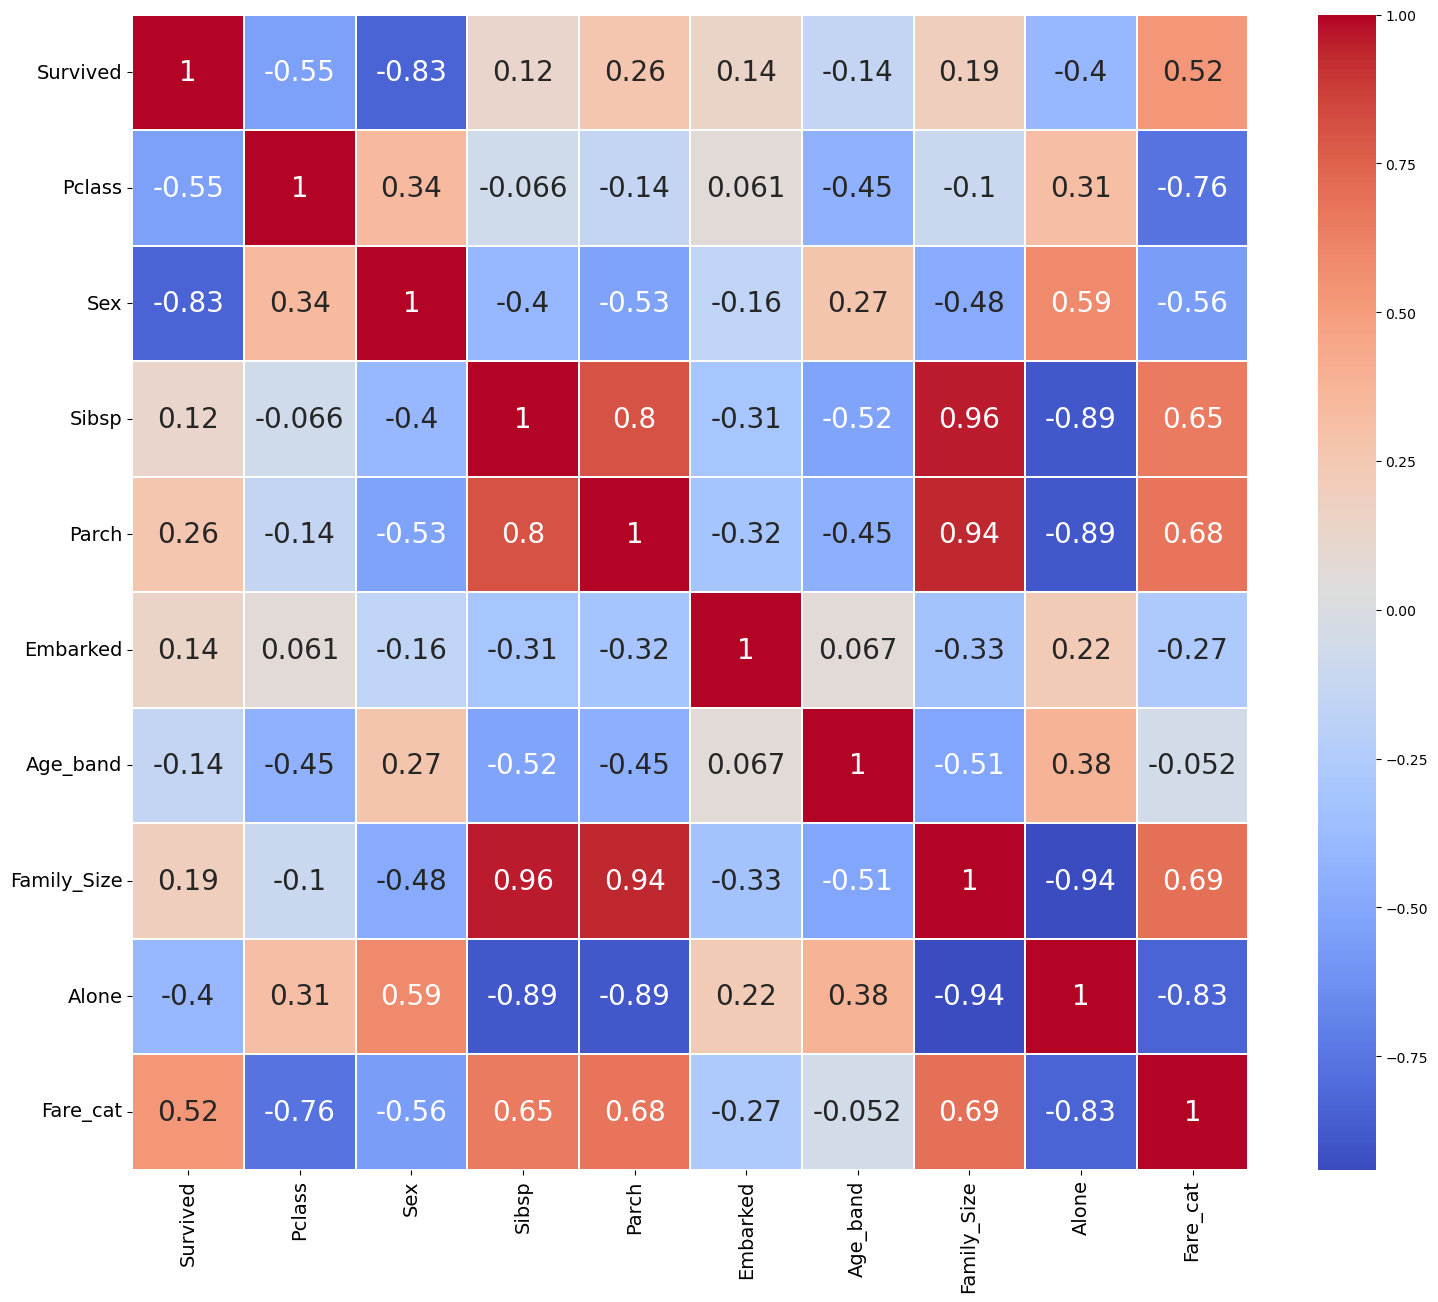

In [72]:
sns.heatmap(data_a.corr(),annot=True,cmap='coolwarm',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Now the above correlation plot, we can see some positively related features. Some of them being **SibSp andd Family_Size** and **Parch and Family_Size** and some negative ones like **Alone and Family_Size.**